# Amazon Web Services (AWS)

AWS (Amazon Web Services) is a cloud computing platform provided by Amazon. It offers a wide range of cloud-based services and solutions, including computing power, storage, databases, analytics, machine learning, security, and more. AWS provides these services to businesses, organizations, and individuals around the world on a pay-as-you-go basis, which means customers only pay for the services they use.


AWS has become one of the most widely used cloud platforms in the world, offering scalability, flexibility, and cost-effectiveness to users. Some of the most popular AWS services include Amazon EC2 (Elastic Compute Cloud) for virtual computing, Amazon S3 (Simple Storage Service) for object storage, and Amazon RDS (Relational Database Service) for managed relational databases. Other popular services include Amazon Lambda, Amazon DynamoDB, Amazon SageMaker, Amazon Redshift, and Amazon Elastic Beanstalk.


AWS has a vast global infrastructure, with data centers located in multiple regions around the world. This allows AWS to provide high availability and low latency services to users in different geographical locations. AWS also offers various tools and services to help customers manage their infrastructure, monitor their applications, and optimize their costs.

# WinSCP

WinSCP (Windows Secure Copy) is a free and open-source SFTP, SCP, and FTP client for Windows. It allows users to securely transfer files between local and remote computers over an encrypted connection. WinSCP is primarily designed for transferring files between Windows and Unix/Linux systems, but it can also be used to transfer files between Windows systems or between Unix/Linux systems.


WinSCP provides a graphical user interface (GUI) that makes it easy to navigate and manage files on both local and remote systems. It supports a variety of file transfer protocols, including SFTP (Secure File Transfer Protocol), SCP (Secure Copy Protocol), FTP (File Transfer Protocol), and WebDAV (Web Distributed Authoring and Versioning). WinSCP also supports integration with PuTTY, another popular SSH client for Windows.


Some of the key features of WinSCP include drag and drop file transfers, directory synchronization, remote file editing, support for multiple languages, and the ability to resume interrupted transfers. It also provides advanced options for managing file permissions, including setting file permissions and ownership on remote systems.


Overall, WinSCP is a powerful and flexible file transfer client for Windows, designed with security and ease of use in mind.

# PuTTY

PuTTY is a free and open-source terminal emulator, serial console and network file transfer application for Windows. It supports several network protocols, including SSH, Telnet, rlogin, and raw TCP. PuTTY is primarily used for connecting to a remote server or computer over a secure shell (SSH) connection, providing users with a command-line interface to execute commands and manage remote systems.


PuTTY has a simple and easy-to-use interface that makes it a popular choice for both novice and experienced users. It provides a variety of configuration options, including session management, terminal settings, font and color settings, and SSH key management. PuTTY also supports various authentication methods, including password authentication, public key authentication, and Kerberos authentication.


One of the key features of PuTTY is its support for SSH tunneling, which allows users to create a secure connection between a local and remote computer, effectively creating a secure network connection between the two systems. This feature is particularly useful for accessing resources on a remote network that would otherwise be inaccessible from a local network.


PuTTY also includes a companion tool called PuTTYgen, which is used for generating SSH keys that can be used for secure authentication. PuTTY is often used in conjunction with other tools, such as WinSCP, for secure file transfers between local and remote systems.


Overall, PuTTY is a reliable and widely-used terminal emulator and SSH client for Windows, providing users with a secure and flexible way to connect to remote systems and manage their infrastructure.

# Steps for Deployment

# Model Training on Student Placements Dataset

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pickle

In [2]:
df = pd.read_csv('../Machine Learning/CSV Files/students_placement.csv')
df

,cgpa,iq,profile_score,placed
0,5.97,106,61,0
1,6.83,113,77,0
2,6.60,110,61,0
3,5.54,113,68,0
4,6.84,102,67,0
...,...,...,...,...
295,6.44,107,54,0
296,6.09,108,52,0
297,7.68,101,70,1
298,7.00,90,28,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cgpa           300 non-null    float64
 1   iq             300 non-null    int64  
 2   profile_score  300 non-null    int64  
 3   placed         300 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 9.5 KB


In [4]:
df.describe()

,cgpa,iq,profile_score,placed
count,300.000000,300.000000,300.000000,300.000000
mean,6.812000,102.570000,60.043333,0.506667
std,0.971568,8.326034,14.282440,0.500791
min,4.600000,83.000000,23.000000,0.000000
25%,6.010000,96.000000,51.000000,0.000000
50%,6.840000,103.500000,60.000000,1.000000
75%,7.502500,109.000000,69.000000,1.000000
max,9.300000,121.000000,100.000000,1.000000


CPU times: total: 1.52 s
Wall time: 2.94 s


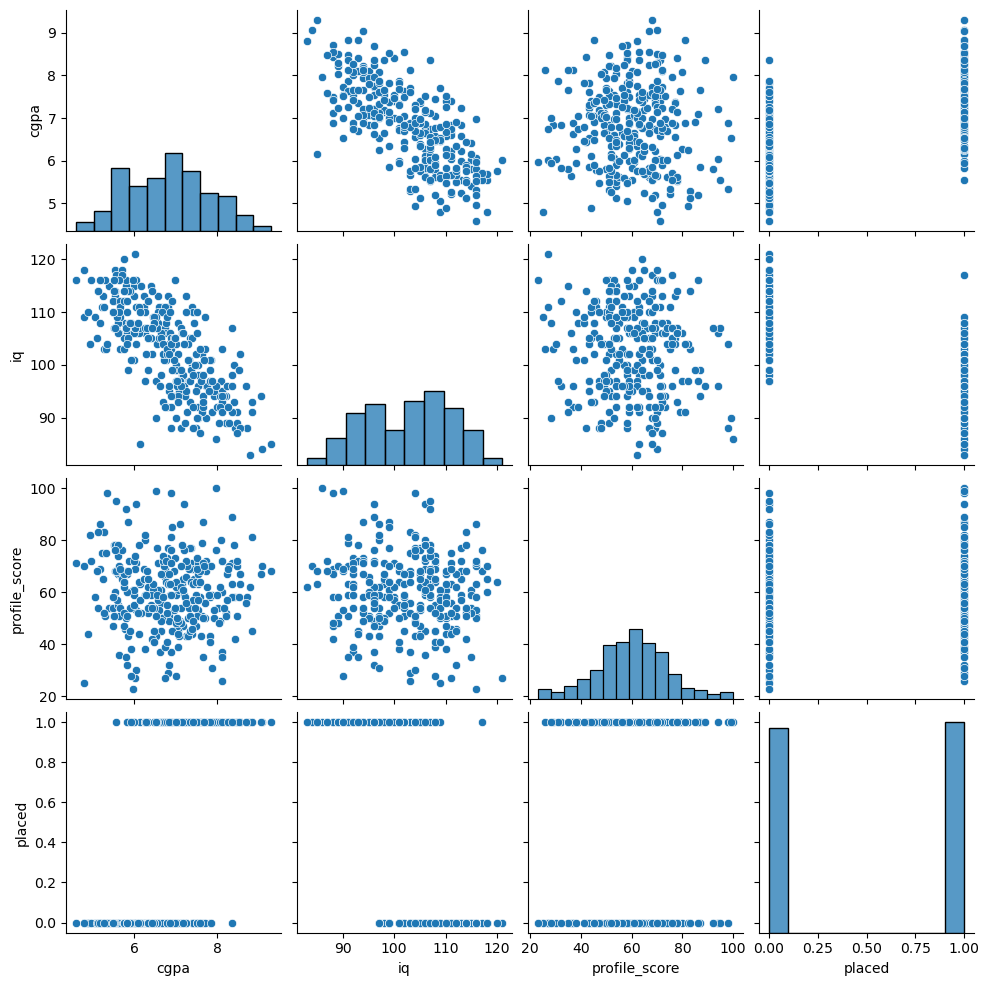

In [5]:
%%time
sns.pairplot(df)

In [6]:
X = df.drop(columns = ['placed'])
y = df['placed']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [8]:
# define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

In [9]:
logreg = LogisticRegression()

In [10]:
# create an instance of RandomizedSearchCV
lr = RandomizedSearchCV(
    estimator=logreg, 
    param_distributions=param_grid, 
    n_iter=50,
    cv=5,
    n_jobs=-1,
    random_state=42
)

In [11]:
# fit the randomized search to the data
lr.fit(X_train, y_train)

C:\Users\Sanket\anaconda3\envs\nlp\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [100, 500, 1000],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42)

In [12]:
# print the best hyperparameters
print('Best hyperparameters:', lr.best_params_)

Best hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'C': 78.47599703514607}


In [13]:
y_pred = lr.predict(X_test)
y_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [14]:
y_test[0:10]

C:\Users\Sanket\AppData\Local\Temp\ipykernel_328\2966258366.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[0:10]


141    0
116    0
214    0
114    0
1      0
83     0
233    1
286    0
254    1
170    0
Name: placed, dtype: int64

In [15]:
score = accuracy_score(y_test,y_pred)
score

0.8833333333333333

In [16]:
# calculate the predicted probabilities on the test set
y_prob = lr.predict_proba(X_test)[:, 1]

In [17]:
%%time
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
auc_roc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

CPU times: total: 0 ns
Wall time: 21.1 ms


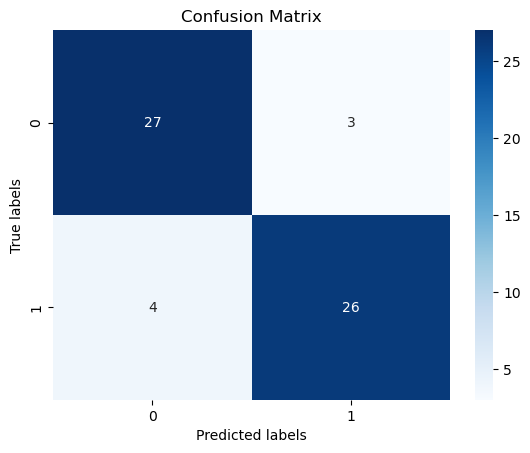

CPU times: total: 281 ms
Wall time: 546 ms


In [18]:
%%time
# plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.8833333333333333
Precision: 0.8837597330367075
Recall: 0.8833333333333333
F1 Score: 0.8833009169213671


In [20]:
pickle.dump(lr, open('model.pkl', 'wb'))